In [161]:
#------------------------------------------------------
#          CALIBRATION OF THE LOG-LINEAR CCM 
#------------------------------------------------------
#
# Written by:
# Dr. Neeraj Saxena
# Senior Professional Leader
# ARRB
# Email: Neeraj.Saxena@arrb.com.au
#
# Summary:
# This Python 3 code uses Nonlinear Regression Technique to calibrate the Log-linear CCM on a given dataset
#
#
# NOTE:
# 1. One needs to install Anaconda + Python 3 before running this script. Installation file is available at: https://www.anaconda.com/products/individual
# 2. Watch a video on how to run a script in Jupyter Notebook
# 3. The dataset should be in the following format:
#    a. Must comprise only two columns with names: 1) MidDistance, and 2) Correlation 
#    b. Must be saved as a *.csv file
# 4. The Column MidDistance must be in metres
#
#

In [162]:
# Importing default libraries - do not change this section
import numpy as np
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import scipy.odr
import scipy.stats
import warnings


In [163]:
# DO NOT CHANGE THIS BLOCK

# Check the default location of your Jupyter Notebook

# IMPORTANT: First only run the Previous and this block only

os.getcwd()

'C:\\Users\\neeraj.saxena\\Desktop\\Python\\Programming\\Nonlinear Regression\\CCM'

In [164]:
# IMPORTANT: Move the Input csv file into the folder which is shown in the path from above block

# E.g. Supoose the previous block gave you the following output:
# 'C:\\Users\\z5005993\\Desktop\\Neeraj Python'

# This means the Python script is located insude the folder Neeraj Python, and the csv file must be moved inside this folder.

# Please MOVE the csv file to this location first before running the next block

In [165]:
# RUN this block only if you have moved your csv file to the right folder.

# Import the csv file
data = pd.read_csv('DataFile.csv', delimiter=',')  # Change the name of the Input csv File
data.head()  # This command displays some of the imported data for quick verification

# NOTE: The column names in your csv must be CongestionIndex and CoV


,MidDistance,Correlation
0,155,0.874642
1,530,0.811988
2,790,0.694062
3,1165,0.659362
4,1460,0.565419


In [166]:
# DO NOT CHANGE THIS BLOCK

# Get the number of rows imported
count_row0 = data.shape[0]
print("No. of rows Imported: " + str(count_row0))

# Delete rows where one of the element is missing
data.dropna()

# Get the number of rows
count_row1 = data.shape[0]
print("No. of rows afer removing Empty rows: " + str(count_row1))

# GOOD WORK! Your Data is now Imported


No. of rows Imported: 2234
No. of rows afer removing Empty rows: 2234


In [167]:
# DO NOT CHANGE THIS BLOCK

# Preparing the Dependent and Independent Variables

# Segregate X and Y into numpy arrays
x = data['MidDistance'].to_numpy()
y = data['Correlation'].to_numpy()

# Converting MidDistance into Kms
x = x/1000


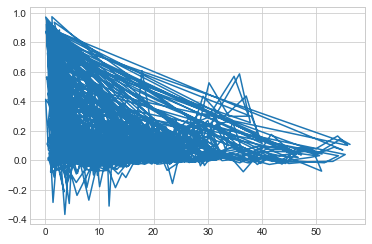

In [168]:
# DO NOT CHANGE THIS BLOCK

# Develop a plot between Independent and Dependent variables
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

plt.plot(x,y)


In [169]:
# DO NOT CHANGE THIS BLOCK

# This is where the Model Calibration starts.
# A Nonlinear Regression Method is utilised.

# Define the formulation of the Log-linear CCM     --> b + (a * np.log(x))
def f(x, a, b):
    c = np.log(x)
    d = a * c
    e = b + d
    return e


def f_wrapper_for_odr(beta, x): # parameter order for odr
    return f(x, *beta)

defpar = [0.1, 0.1]
parameters, cov= curve_fit(f, x, y, p0=defpar)

model = scipy.odr.odrpack.Model(f_wrapper_for_odr)
data0 = scipy.odr.odrpack.Data(x,y)
myodr = scipy.odr.odrpack.ODR(data0, model, beta0=parameters,  maxit=100)
myodr.set_job(fit_type=2)
parameterStatistics = myodr.run()
df_e = len(x) - len(parameters) # degrees of freedom, error
cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta
ci = []
t_df = scipy.stats.t.ppf(0.975, df_e)
ci = []
for i in range(len(parameters)):
    ci.append([parameters[i] - t_df * parameterStatistics.sd_beta[i], parameters[i] + t_df * parameterStatistics.sd_beta[i]])

tstat_beta = parameters / parameterStatistics.sd_beta # coeff t-statistics
pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values

print("-----------------------------------------------------------------")
print("The results presented are in the following order: a - b")
print("-----------------------------------------------------------------\n")

for i in range(len(parameters)):
    print('parameter:', parameters[i])
    print('   conf interval:', ci[i][0], ci[i][1])
    print('   tstat:', tstat_beta[i])
    print('   pstat:', pstat_beta[i])
    print()
    

-----------------------------------------------------------------
The results presented are in the following order: a - b
-----------------------------------------------------------------

parameter: -0.12076635076476308
   conf interval: -0.12763461058485565 -0.11389809094467052
   tstat: -34.48124105264554
   pstat: 0.0

parameter: 0.41818450470772134
   conf interval: 0.4016998025149126 0.43466920690053007
   tstat: 49.747411938868936
   pstat: 0.0



In [170]:
# DO NOT CHANGE THIS BLOCK

# Evaluating the overall goodness-of-fit of the ATAP Model

print("-----------------------------------------------------------------")
print("GOODNESS-OF-FIT STATISTICS")
print("-----------------------------------------------------------------\n")

modelPredictions = f(x, *parameters) 

absError = modelPredictions - y

SQabsError = (modelPredictions - y)**2
TotError = (y - np.average(y))**2
Rsquared = 1.0 - np.sum(SQabsError) / np.sum(TotError)
print('Residual:', np.sum(SQabsError))
print('R-squared:', Rsquared)

print("\n~~ MODEL CALIBRATION SUCCESSFUL ~~")


-----------------------------------------------------------------
GOODNESS-OF-FIT STATISTICS
-----------------------------------------------------------------

Residual: 63.78116970788689
R-squared: 0.3475507995649898

~~ MODEL CALIBRATION SUCCESSFUL ~~
